In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
# import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import glob as glob
# import arrow
import matplotlib
matplotlib.style.use('ggplot')

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
max_temp = glob.glob("met18000/yr2013-2016/maxtemp-*")
max_temp

['met18000/yr2013-2016/maxtemp-1.xls',
 'met18000/yr2013-2016/maxtemp-2.xls',
 'met18000/yr2013-2016/maxtemp-3.xls',
 'met18000/yr2013-2016/maxtemp-4.xls',
 'met18000/yr2013-2016/maxtemp-5.xls']

In [6]:
temp = glob.glob("met18000/yr2013-2016/*")


In [7]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

In [8]:
dengues = glob.glob("temp/*.csv")
dengues = dengues[:-2]

In [9]:
list_ = []
for file_ in dengues:
    df = pd.read_csv(file_)
    list_.append(df)
    allDengue = np.concatenate(list_)

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity

In [10]:
temperature = glob.glob("met18000/yr2001-2012/*.xls")
temperature

['met18000/yr2001-2012/daily-1.xls',
 'met18000/yr2001-2012/daily-2.xls',
 'met18000/yr2001-2012/daily-3.xls',
 'met18000/yr2001-2012/daily-4.xls',
 'met18000/yr2001-2012/daily-5.xls']

In [11]:
list_ = []
for file_ in temperature:
    df = pd.read_excel(file_)
    list_.append(df)
    allTemps = np.concatenate(list_)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [12]:
allDengue_copy = allDengue.copy()
allDengue_copy[:,9] = allDengue_copy[:,9].astype('str')

In [13]:
def seperate(data,distinct):
    tmp = []
    for distinct_province in distinct:
        sub_tmp = []
        for data_province in data:
            if data_province[9][:2] == distinct_province:
                sub_tmp.append(data_province)
        sub_tmp = np.array(sub_tmp)
        tmp.append(sub_tmp)
    return np.array(tmp)

def plotByDate(allDates,title):
    df = pd.DataFrame(allDates,columns=['date'])
    df.groupby([df.date.dt.year,df.date.dt.week]).count().plot(kind="bar",figsize=(120,8))
    plt.grid(True);
    plt.title(title)
    plt.xlabel("Weeks")
    plt.ylabel("Cases")
#     plt.savefig(title+".png",dpi = 150)

def cleanDate(raw_dates):
    toRemove = []
    for i,elt in enumerate(raw_dates):
        if elt == '0000-00-00' or type(elt) == float:
            print "to be removed", i, elt
            toRemove.append(i)

    raw_dates = np.delete(raw_dates, toRemove, axis=0)
    return raw_dates

In [14]:
# seperate the by province

unique_province = allDengue_copy[:len(allTemps),9]
# seperate by changwat 10 is bangkok
unique_province = np.array([i[:2] for i in unique_province]) 
unique_province = np.unique(unique_province)
# unique_province

In [15]:
allProvinces = seperate(allDengue_copy,unique_province)

In [16]:
dates = allProvinces[0][:][:,15] # by province

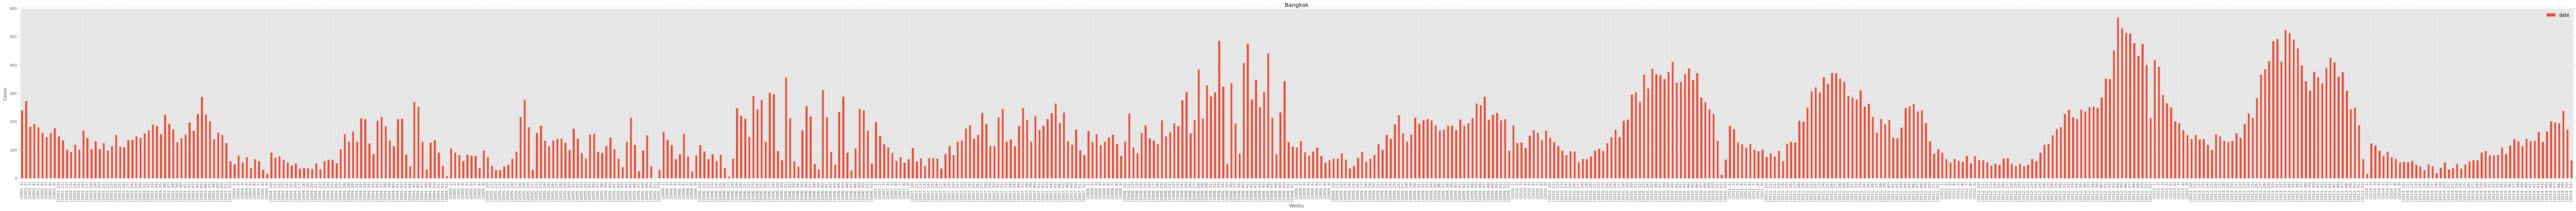

In [17]:
BKKdates = allProvinces[0][:][:,15]
BKKdatesMth = cleanDate(dates).astype("datetime64")
plotByDate(BKKdatesMth,"Bangkok")

In [18]:
BKKdates = allProvinces[0][:][:,15]
BKKdatesMth = cleanDate(dates).astype("datetime64")

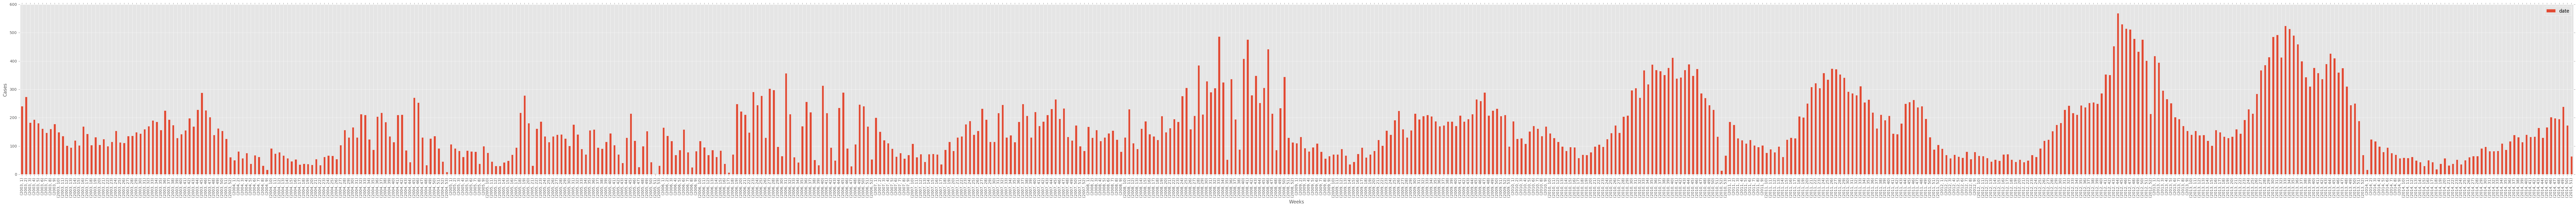

In [19]:
df = pd.DataFrame(BKKdatesMth,columns=['date'])
allWeeks = df.groupby([df.date.dt.year,df.date.dt.week]).count()

df.groupby([df.date.dt.year,df.date.dt.week]).count().plot(kind="bar",figsize=(120,8))
# plt.grid(True);
# plt.title(title)
plt.xlabel("Weeks")
plt.ylabel("Cases")

In [20]:
newSer = pd.Series(df)
newSer0 = newSer.groupby([df.date.dt.year,df.date.dt.week]).count()

In [21]:
denguesByWeekBKK = np.array([i for i in newSer0])
BKKdf = pd.DataFrame(denguesByWeekBKK,columns=['freq'])

In [22]:
# create index to be the date starting from 2003-01-06
# add this onto the freq

start = datetime.datetime.strptime("2003-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(weeks=x) for x in range(0,625)]


In [23]:
BKKdf['date'] = pd.Series(date_list, index=BKKdf.index)

In [24]:
BKKdf = BKKdf[['date','freq']]
BKKdf.set_index(['date'], inplace=True)
BKKdf.index.name=None

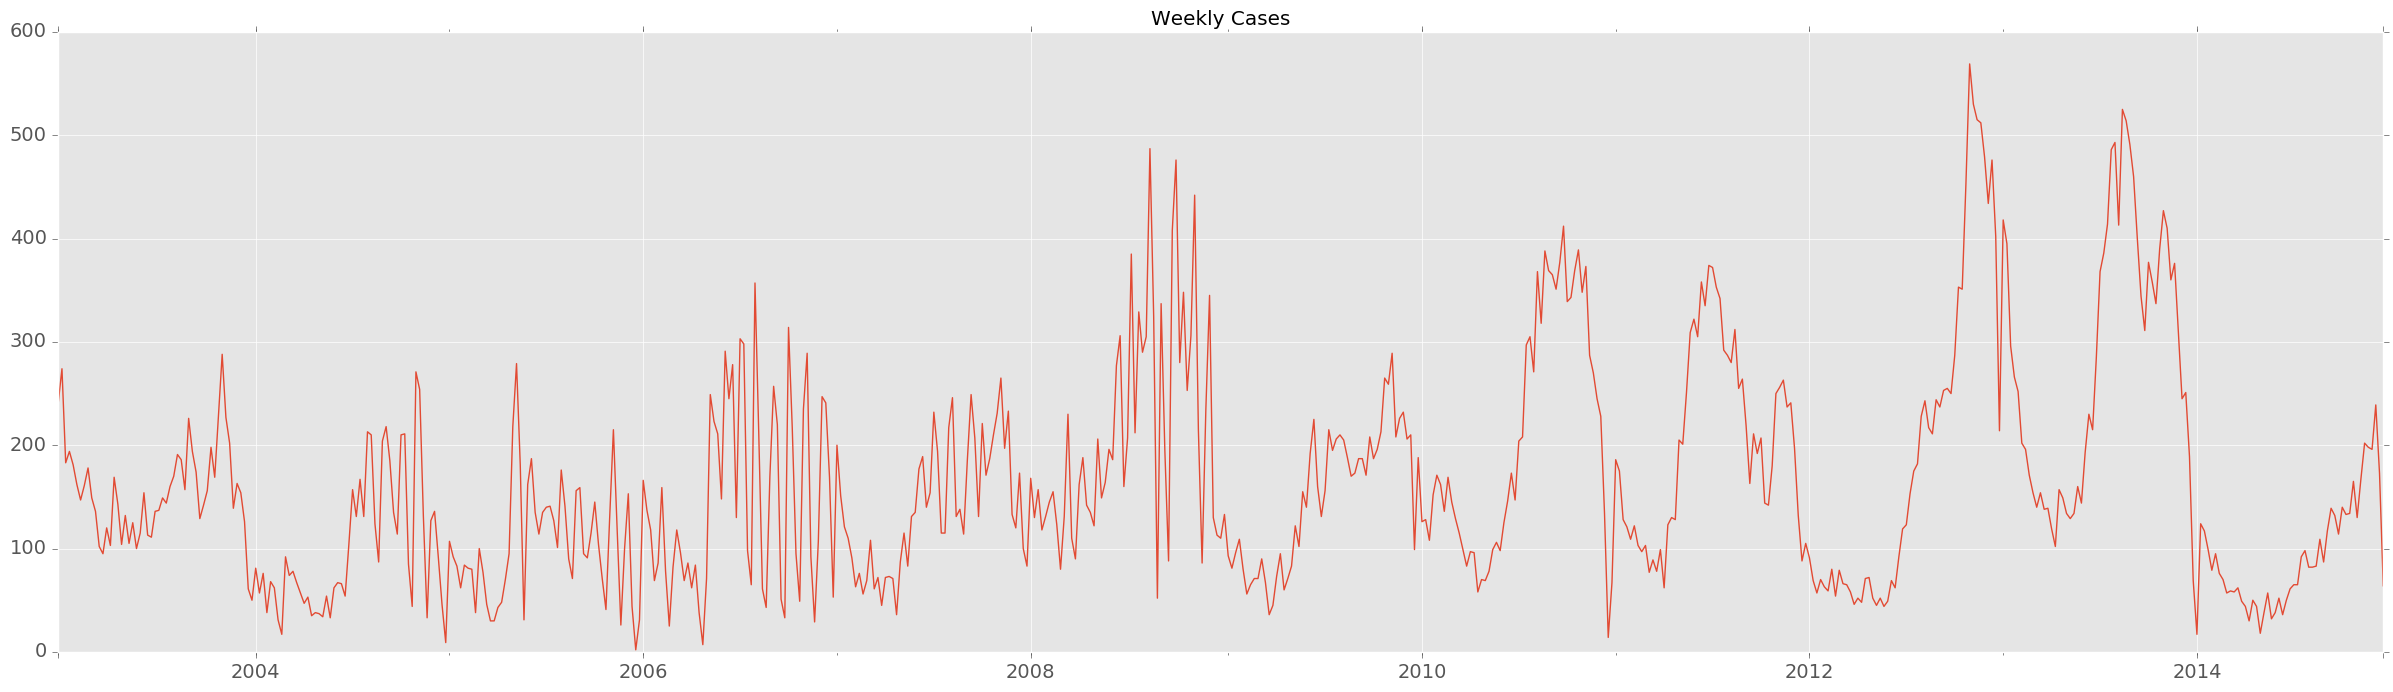

In [25]:
BKKdf.freq.plot(figsize=(30,8), title= 'Weekly Cases', fontsize=14)
# plt.savefig('month_ridership.png', bbox_inches='tight')

## ARIMA(0,1,0)(0,1,0) average by month

### predicted Y(t) = Y(t-12) + Y(t-1) - Y(t-13)

### model 1

In [26]:
mnthBkk = pd.Series(df)
newSer1 = mnthBkk.groupby([df.date.dt.year,df.date.dt.month]).count()
denguesByWeekBKK = np.array([i for i in newSer1])
bkkDf = pd.DataFrame(denguesByWeekBKK,columns=['freq'])

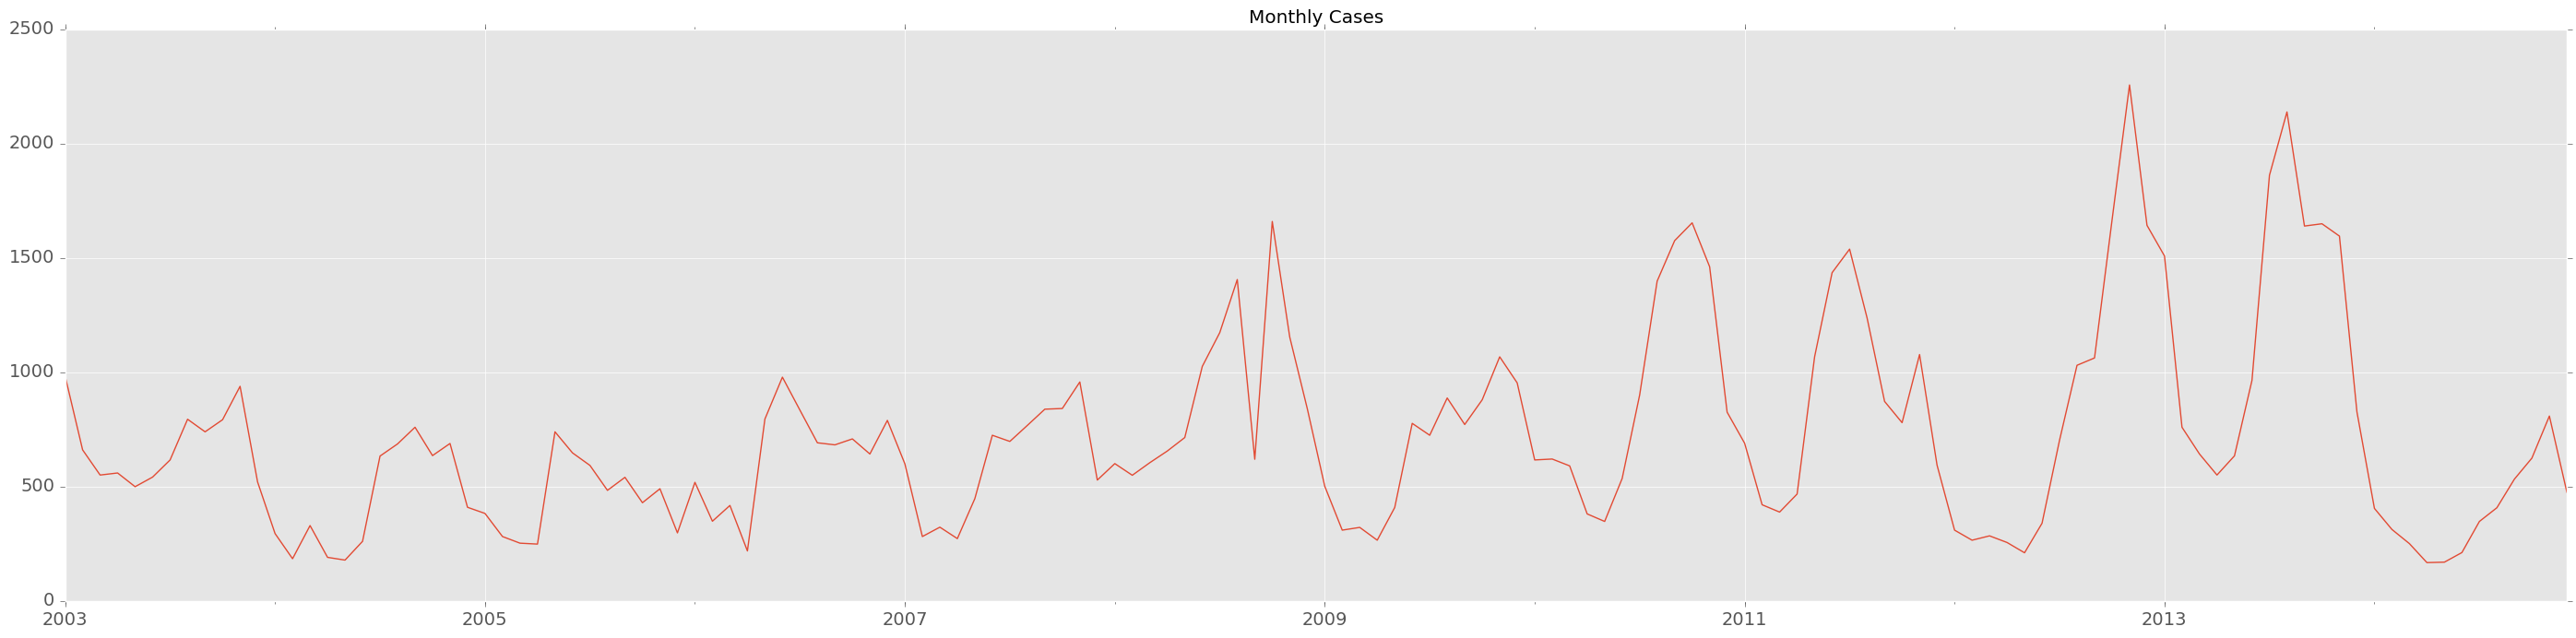

In [27]:
start = datetime.datetime.strptime("2003-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,144)]
bkkDf['date'] = pd.Series(date_list, index=bkkDf.index)
bkkDf = bkkDf[['date','freq']]
bkkDf.set_index(['date'], inplace=True)
bkkDf.index.name=None
real = bkkDf.freq.plot(figsize=(35,8), title= 'Monthly Cases', fontsize=14)

In [137]:
# want to make 12 weeks prediction
# week = 54
# a[week-52] + a[week -1] - a[week-53]

In [131]:
def simple_seasonal_predictor(arr,start_from,year):
    temp = []
    start = 12
#     previous = arr[119]
    n = (year * 12) + 1
    for i in range(n):
        predicted = arr[start-12] + (arr[start-1] - arr[start-13])
#         previous = predicted
        temp.append(predicted)
        start+=1
    
    start_mth = datetime.datetime.strptime(start_from, "%Y-%m-%d")
    date_list = [start_mth + relativedelta(months=x) for x in range(0,n)]
    return date_list, temp



(396, 539)

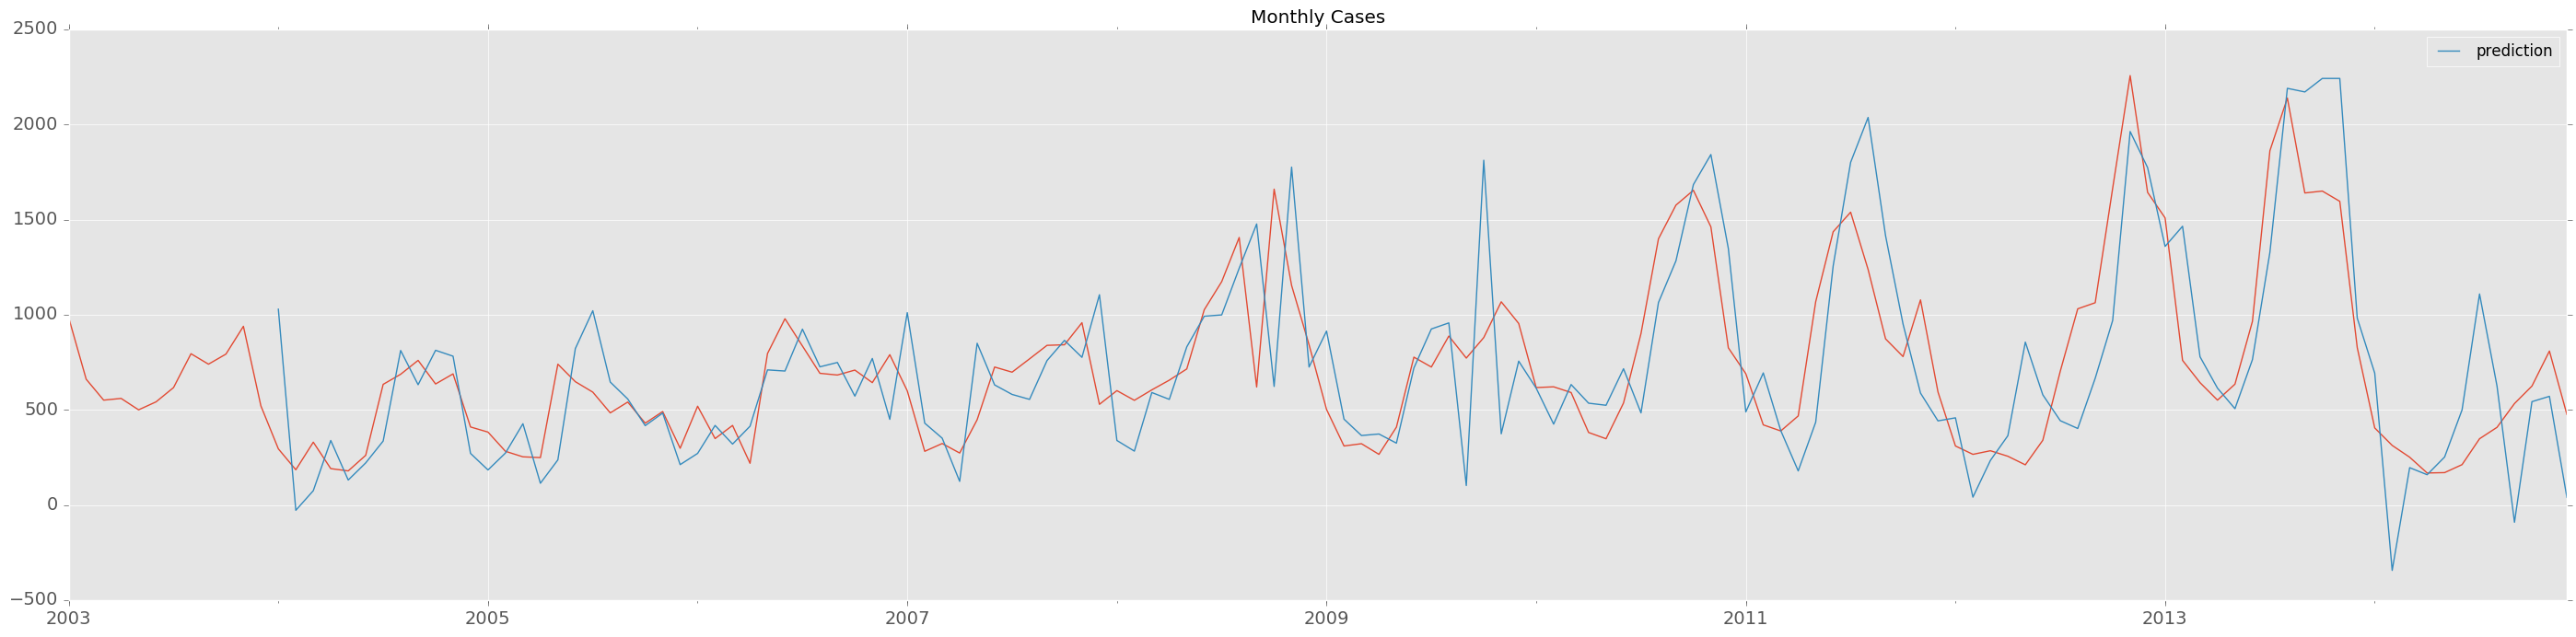

In [136]:
a = simple_seasonal_predictor(bkkDf.freq[:],"2004-01-01",11)
tmp = pd.DataFrame(a[1],a[0])
tmp.columns = ['freq']
tmp.index.name = "date"
bkkDf['prediction'] = tmp
bkkMonth = bkkDf.freq.plot(figsize=(35,8), title= 'Monthly Cases', fontsize=14)
bkkDf.prediction.plot(legend='Prediction')
bkkMonth.set_xlim(pd.Timestamp('2003-01-01'), pd.Timestamp('2014-12-01'))

In [134]:
bkkDf.head()

,freq,prediction
2003-01-01,984,NaN
2003-02-01,661,NaN
2003-03-01,551,NaN
2003-04-01,560,NaN
2003-05-01,500,NaN


In [ ]:
# b = seasonal_predictor(bkkDf.freq/4.,"2013-01-01")
# tmp01 = pd.DataFrame(b[1],b[0])
# tmp01.columns = ['freq']
# tmp01.index.name = "date"
# bkkDf['prediction'] = tmp01
# bkkMonthAvg = bkkDf.freq.plot(figsize=(35,8), title= 'Monthly Cases', fontsize=14)
# bkkDf.prediction.plot(legend='Prediction')
# bkkMonthAvg.set_xlim(pd.Timestamp('2012-01-01'), pd.Timestamp('2014-12-01'))